In [1]:
import pandas as pd
import jieba

In [2]:
# 读取文件，过滤缺失值
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [3]:
df_news.shape

(5000, 4)

In [4]:
# 结巴要求传入list
content = df_news.content.values.tolist()
print (content[2])

ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展上，ＭＩＮＩ品牌带来了全新的ＣＯＵＮＴＲＹＭＡＮ　ＪＣＷ版和Ｃｌｕｂｖａｎ概念车以及更多ＪＣＷ性能版车型亮相。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖谕夤凵媳浠非常明显，其加装了空气动力学套件外观，并且针对个性的性能版车型采用了非常吸引眼球的黑色车身配红色车顶以及红色拉花的搭配。新款车型在性能上也做了改进，采用１８英寸合金轮毂，高性能刹车套件以及运动化悬挂组件，配合运动版尾排以及车侧的ＪＣＷ徽标彰显着这是一款体现性能的车型。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖诙力上搭载的是一款１６０千瓦的１．６升涡轮增压引擎，最大扭矩３００牛米，同时还配有全轮驱动系统，百公里加速仅需７．０秒，极速被限制在２２５ｋｍ／ｈ或２２３ｋｍ／ｈ（选装６速自动变速箱）。．．．全文　＞　（来源：网上车市）


## 使用结巴分词器

In [5]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\XIANGL~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.882 seconds.
Prefix dict has been built successfully.


In [57]:
print(content_S[500],end="")

['本报讯', '\u3000', '（', '记者', '周宇', '）', '针对', '民间', '投资', '“', '新', '三十六条', '”', '落地', '而', '出台', '的', '４', '２', '项', '民间', '投资', '实施细则', '已经', '全部', '出', '齐', '。', '国家', '发改委', '昨日', '表示', '，', '实施细则', '与', '社会', '上', '迫切要求', '改善', '民营企业', '经营', '发展', '环境', '的', '热切期望', '还', '存在', '一定', '差距', '，', '需要', '通过', '实践', '不断完善', '政策', '体系', '。', '接下来', '要', '在', '铁路', '、', '市政', '、', '能源', '、', '电信', '、', '卫生', '、', '教育', '等', '领域', '抓紧', '做', '几件', '看得见', '、', '鼓舞人心', '的', '实事', '，', '提振', '民间', '投资', '的', '发展', '信心', '。', '９', '家', '发改委', '表示', '，', '４', '２', '项', '实施细则', '首先', '解决', '了', '实施细则', '的', '有无', '问题', '。', '从', '其', '本身', '来看', '，', '在', '制定', '过程', '中', '有关', '部门', '是', '力求', '有所突破', '的', '。', '例如', '《', '关于', '鼓励', '和', '引导', '民间', '资本', '进入', '银行业', '的', '实施', '意见', '》', '，', '将', '村镇', '银行', '主', '发起', '行', '的', '最低', '持股', '比例', '由', '２', '０', '％', '降低', '到', '１', '５', '％', '。']

In [7]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [8]:
# 读取停用词表
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [9]:
# 根据停用词过滤分词后的文本list，因为是双层list，所以用双循环
"""
将双层循环一层一层取出来过滤然后再放回一个双层list里面，其中为了做词云
额外将过滤后的所有词放入一层list
"""
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords) 

In [10]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [11]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [13]:
df_all_words.shape

(993928, 1)

In [12]:
# 对all_words列进行分组聚合，计算出现次数，并根据出现次数进行升序排序
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count"})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


In [14]:
words_count.shape

(104784, 2)

### 词云

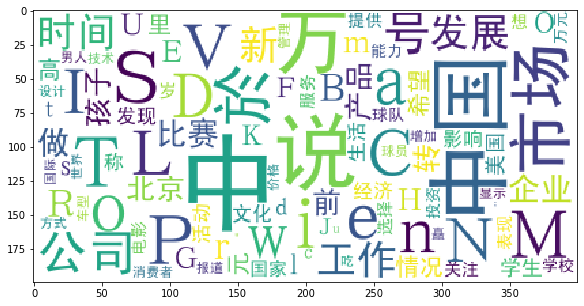

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [18]:
# 补上分类标签
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [19]:
# 将标签文本映射成数字
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [30]:
# 将一个list里所有元素转换成整体文本，符合特征提取的数据格式要求
def extact(data):
    words = []
    for line_index in range(len(data)):
        try:
            # 保留分词效果
            words.append(' '.join(data[line_index]))
        except:
            print (line_index,word_index)
    return words

In [36]:
extact(df_train['contents_clean'].values)[0:2]

['经销商 电话 试驾 订车 Ｕ 憬 杭州 滨江区 江陵 路 号 转 保常 叮 万 阒 菔 邪 自魄 白云 大道北 号 广州市 天河区 黄埔 大道 西 号 富力 盈泰 大厦 室 转 保常福 万 Ｉ 蕉 省 淄博市 张店区 山泉 路 号 转 保常 叮 万 罅 保税区 黄海 西 三路 号 转 保玻埃 万 Ｌ 粕 绞 新 纺锨 复兴路 号 转 保常 叮 万 Ｖ 泄 云南 昆明市 度假区 滇池 路 号 转 保常 叮 万 Ｒ 川市 兴庆区 丽景 北街 号 转 保常 叮 万 尔滨市 道外区 先锋 路 号 转 保 矗福 万 ど 呈刑 煨 桂花 坪 街道 雀园 路口 星沙 中南 汽车 世界 区 号 转 保常 梗 万 Ｎ 浜 菏 信塘城 经济 开发区 盘龙 汽车城 矗埃埃福 转 保常 叮 万 阒莘禺 区市 广路 号 祈福 食街 旁 矗埃埃福 转 保常 叮 万 Ｆ 侄 新区 御桥 路 号 转 保常福 万 不帐 戏适 邪河 工业区 纬 一路 号 万 Ｉ 虾 Ｊ 斜 ι 角江 杨 南路 号 转 保常 叮 万 ｔ 奚蕉路 号 转 保常 叮 万 ┦ 谐阳区 北四环 望京 街 号 转 保玻福 万 ┦ 胁 平区立 汤路 亚北博晟 汽车 汇展 中心 保埃福 万 西省 南昌市 青山湖区 科技 大道 号 万 Ｉ 苄 耸信 劢 工业区 康宁 路 车管所 对面 保常 叮 万 Ｄ 暇 ┦ 薪宁区 天元 中路 号 转 保常 叮 万 ご 菏形 餍 戮济 技术开发区 长沈路 号 万 Ｊ 家庄 市 北二环 东路 号 河北 国际 汽车贸易 园区 矗埃埃福 转 保 矗福 万 壅 ⑶ 城港路 号 广达 车城 永兴路 号 万 Ｉ 蜓 羰刑 西区 北二 中路 号 转 保常 叮 万 啥际星 嘌 虼 蟮 溃 保福 负牛 ㄐ 挛幕宫 对面 保 矗常 万 赡省 沈阳市 皇姑区 鸭绿江 街 号 甲 长客 总站 北 行 米 保 矗福 万 Ｉ 钲 谑 新藓区 罗芳 立交 六星 汽车 园 进口 大众 Ｓ 店 转 保担 埃 万 ご 憾 环城路 号 万',
 '呼叫 热线 服务 邮箱 ｋ ｆ ｐ ｅ ｏ ｐ ｌ ｅ ｄ ａ ｉ ｌ ｙ ｃ ｏ ｍ ｃ ｎ']

In [55]:
# 划分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [46]:
print(x_train[0],end="")

['中新网', '上海', '日电', '于俊', '父亲节', '网络', '吃', '一顿', '电影', '快餐', '微', '电影', '爸', '对不起', '我爱你', '定于', '本月', '父亲节', '当天', '各大', '视频', '网站', '首映', '葜', '谱', '鞣', '剑', '保慈', '障蚣', '钦', '呓', '樯', '埽', '⒌', '缬', '埃', 'ǎ', '停', '椋', '悖', '颍', '铩', '妫', '椋', '恚', '称', '微型', '电影', '新', '媒体', '平台', '播放', '状态', '短时', '休闲', '状态', '观看', '完整', '策划', '系统', '制作', '体系', '支持', '显示', '较完整', '故事情节', '电影', '微', '超短', '放映', '微', '周期', '制作', '天', '数周', '微', '规模', '投资', '人民币', '几千', '数万元', '每部', '内容', '融合', '幽默', '搞怪', '时尚', '潮流', '人文', '言情', '公益', '教育', '商业', '定制', '主题', '单独', '成篇', '系列', '成剧', '唇', '开播', '微', '电影', '爸', '对不起', '我爱你', '讲述', '一对', '父子', '观念', '缺少', '沟通', '导致', '关系', '父亲', '传统', '固执', '钟情', '传统', '生活', '方式', '儿子', '新派', '音乐', '达', '习惯', '晚出', '早', '生活', '性格', '张扬', '叛逆', '两种', '截然不同', '生活', '方式', '理念', '差异', '一场', '父子', '间', '拉开序幕', '子', '失手', '打破', '父亲', '心爱', '物品', '父亲', '赶出', '家门', '剧情', '演绎', '父亲节', '妹妹', '哥哥', '化解', '父亲', '这场', '矛盾', '映逋坏', '嚼', '斫', '狻', '⒍', '粤', '⒌', '桨容', '争执', '退让', '传统

In [47]:
extact(x_train)[0]

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [33]:
# 存入数据库
"""
详见dataTreating.save_db()
"""

'\n详见dataTreating.save_db()\n'

In [48]:
type(extact(x_train))

list

### 训练模型

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 3.特征抽取，用tf-idf进行文本特征提取
transfer = TfidfVectorizer()
x_train = transfer.fit_transform(extact(x_train))
x_test = transfer.transform(extact(x_test))

# 4.调用贝叶斯预估器
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

# 5.预估类别
# class_ =  classifier.predict(x_test)
# 5.计算准确率
score = classifier.score(x_test, y_test)

print(score)
# print(class_)

0.8248


In [34]:
# 根据tf-idf提取关键字以及其权重
import jieba.analyse
index = 2400
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5)))

法国ＶＳ西班牙、里贝里ＶＳ哈维，北京时间６月２４日凌晨一场的大战举世瞩目，而这场胜利不仅仅关乎两支顶级强队的命运，同时也是他们背后的球衣赞助商耐克和阿迪达斯之间的一次角逐。Ｔ谌胙”窘炫分薇的１６支球队之中，阿迪达斯和耐克的势力范围也是几乎旗鼓相当：其中有５家球衣由耐克提供，而阿迪达斯则赞助了６家，此外茵宝有３家，而剩下的两家则由彪马赞助。而当比赛进行到现在，率先挺进四强的两支球队分别被耐克支持的葡萄牙和阿迪达斯支持的德国占据，而由于最后一场１／４决赛是茵宝（英格兰）和彪马（意大利）的对决，这也意味着明天凌晨西班牙同法国这场阿迪达斯和耐克在１／４决赛的唯一一次直接交手将直接决定两家体育巨头在此次欧洲杯上的胜负。８据评估，在２０１２年足球商品的销售额能总共超过４０亿欧元，而单单是不足一个月的欧洲杯就有高达５亿的销售额，也就是说在欧洲杯期间将有７００万件球衣被抢购一空。根据市场评估，两大巨头阿迪达斯和耐克的市场占有率也是并驾齐驱，其中前者占据３８％，而后者占据３６％。体育权利顾问奥利弗－米歇尔在接受《队报》采访时说：“欧洲杯是耐克通过法国翻身的一个绝佳机会！”Ｃ仔尔接着谈到两大赞助商的经营策略：“竞技体育的成功会燃起球衣购买的热情，不过即便是水平相当，不同国家之间的欧洲杯效应却存在不同。在德国就很出色，大约１／４的德国人通过电视观看了比赛，而在西班牙效果则差很多，由于民族主义高涨的加泰罗尼亚地区只关注巴萨和巴萨的球衣，他们对西班牙国家队根本没什么兴趣。”因此尽管西班牙接连拿下欧洲杯和世界杯，但是阿迪达斯只为西班牙足协支付每年２６００万的赞助费＃相比之下尽管最近两届大赛表现糟糕法国足协将从耐克手中每年可以得到４０００万欧元。米歇尔解释道：“法国创纪录的４０００万欧元赞助费得益于阿迪达斯和耐克竞逐未来１５年欧洲市场的竞争。耐克需要笼络一个大国来打赢这场欧洲大陆的战争，而尽管德国拿到的赞助费并不太高，但是他们却显然牢牢掌握在民族品牌阿迪达斯手中。从长期投资来看，耐克给法国的赞助并不算过高。”
耐克  阿迪达斯  欧洲杯  球衣  西班牙
